<a href="https://colab.research.google.com/github/joseph-c-mcguire/Portfolio/blob/main/Network_Graph_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Types of Graphs

## Undirected Graph
For an undirected graph, this is a graph where edges don't have direction, then we have that in general if the graph is $G = (V,E)$ then the degree of a node $v_i \in V$ can be defined by:
$$k_i = \text{The }\# \text{ of edges adjacent to } v_i.$$
And the average degree of a node will be:
$$\langle k \rangle = \dfrac{1}{N} \sum_{i = 1}^N k_i = \dfrac{2 |E|}{|V|}.$$
We can see this nicely with random graphs, these are graphs where are vertex set is fixed, $V$, and a probability that the nodes $v_i$ and $v_j$ are joined by an edge is a uniform probability $p$.

Play around with this below:



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the number of vertices
V = 10
# Establish the chances of an edge being added vertex to vertex
p = 0.7
# Initializes the graph
G = nx.karate_club_graph()
# Creates a random graph with V-vertices and a probability of p
# Assigns the size of the edge set to E
E = G.size()

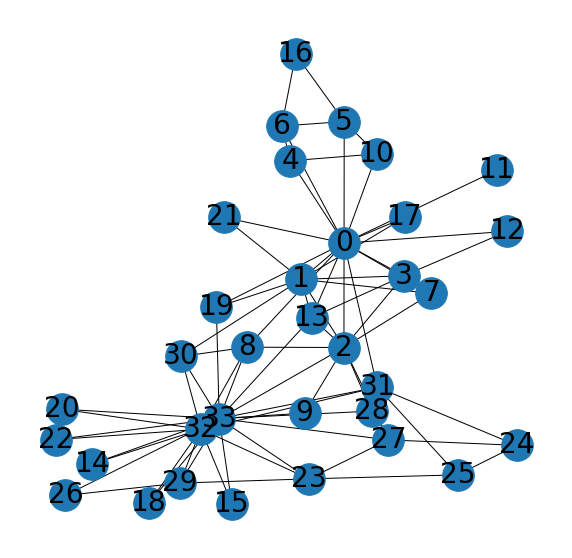

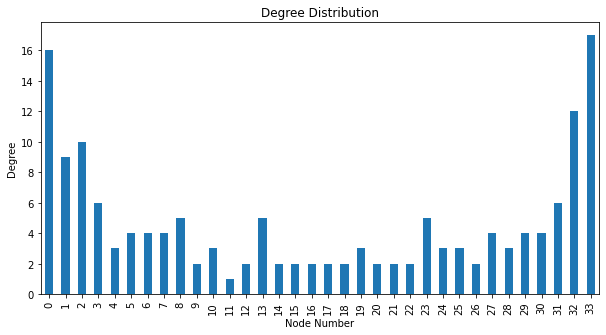

In [ ]:
from IPython.core.pylabtools import figsize
from networkx.algorithms.bipartite.basic import color
# Layout the shape of the graph
position = nx.spring_layout(G)
# Draw the graph, with the above position mapping and a modified
# node size
fig1, ax1 = plt.subplots(figsize=(10,10))
nx.draw(G, pos=position, node_size= 1000)
nx.draw_networkx_labels(G, pos=position, font_size = 28, font_color = 'black')
plt.savefig('undirected_graph.png')
# On a seperate plot map the distribution of node degrees
degrees = [v for k,v in nx.degree(G)]

pd.DataFrame(degrees).plot.bar(legend=False,figsize=(10,5))
plt.title('Degree Distribution')
plt.xlabel('Node Number')
plt.ylabel('Degree')
plt.savefig('degree_dist.png')

c_b = nx.betweenness_centrality(G)

## Directed Graphs
A directed graph is the same pairing of a vertex set with an edge set however, this time, the edges are not reciprical they only go one way.

Some facts hold true for directed graphs:
$$\text{Total }\# \text{ of edges coming out of nodes} = \text{Total }\# \text{ of edges coming out of nodes}$$
For an individual node, $v$, these are defined as In-Degree $k_{in,v}$ and as Out-Degree $k_{out, v}$.

We have that:
$$\overline{k_{in}} = \overline{k_{out}}.$$

The Average In-Degree is 1.0
The Average Out-Degree is 1.0


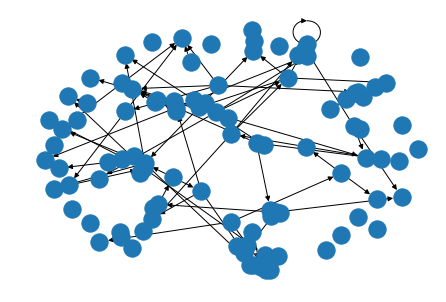

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Initialize G as a directed graph in Networkx
G = nx.DiGraph()
# Set the number of nodes
V = 100
# Set the number of edges
E = 100
# Add the nodes to G
G.add_nodes_from(range(0,V))
# Add the edges to G
temp = np.random.randint(0,V, size = (E,2))
G.add_edges_from(temp)

k_in = np.array(G.in_degree())
k_out = np.array(G.out_degree())
k = np.array(G.degree())
print("The Average In-Degree is " + str(k_in[:,1].mean()))
print("The Average Out-Degree is " + str(k_out[:,1].mean()))

nx.draw(G)

## Bipartite Graphs

A bipartite graph is still a graph but one that can be represented as two node subsets of $V$, call them $U$ and $W$, such that any two nodes in $U$ don't have any edges between them, but there is an edge to a node in $W$.
The same must hold true for $W$ to $U$.

The mean value of the degrees is 5.8


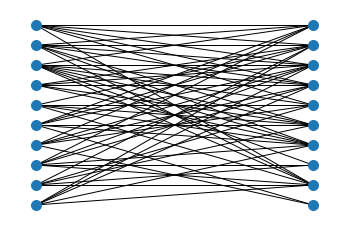

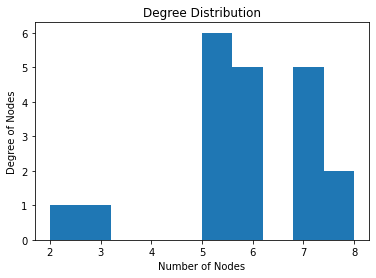

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite

# Initialize G as a directed graph in Networkx
G = nx.Graph()
# Set the number of node of the left set
V_l = 10
# Set the number of nodes of the right set
V_r = 10
# Set the probability two nodes in the distinct sets will be joined by an edge
p = 0.5

G = bipartite.random_graph(V_l,V_r,p)
bottom_nodes, top_nodes = bipartite.sets(G)
location = nx.bipartite_layout(G,bottom_nodes)

# Layout the shape of the graph
# Draw the graph, with the above position mapping and a modified
# node size
fig1, ax1 = plt.subplots()
nx.draw(G, pos=location, node_size=100 )
# On a seperate plot map the distribution of node degrees
fig1, ax2 = plt.subplots()
degrees = [v for k,v in nx.degree(G)]
plt.hist(degrees)
plt.title("Degree Distribution")
plt.xlabel("Number of Nodes")
plt.ylabel("Degree of Nodes")
print("The mean value of the degrees is " + str(np.mean(degrees)))

##  Weighted Graphs

A weighted graph $G$ is a graph where values are assigned to edges. 

Shown below is a weighted simple graph, but this can be generalized to directed and multigraphs

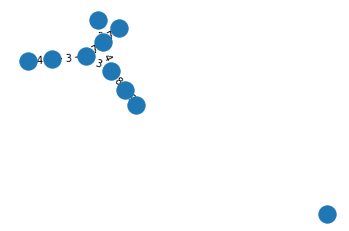

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.drawing.nx_pydot import write_dot

# Initialize G as a directed graph in Networkx
G = nx.Graph()
# Set the number of nodes
V = 10
# Set the number of edges
E = 10
# Add the nodes to G
G.add_nodes_from(range(0,V))
# Add the edges to G
edges = np.random.randint(0,V, size = (E,3))
G.add_weighted_edges_from(edges)
position = nx.spring_layout(G)
k = np.array(G.degree())
labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos = position, edge_labels = labels)
nx.draw(G,position)


# Features

An important peice of any data science project is focusing on the features of a peice of data.
 For example, maybe we're trying to predict housing prices in Seattle and we have information like square-footage and number of bedrooms, these would be two features in our model.

So we seek to identify features at the three levels of concern for a graph:


1.   Nodes
2.   Edges
3.   Graphs





## Node Features

For nodes, we seek some discerning features about them.
The first and most basic is a nodes degree:


*   Degree: $k_v = \# $ of nodes that are adjacent to v

This however is a rudimentary feature at best, for example, many different nodes may have the same degree but be vastly different in their importance in a network.
Or we might have the same degree sequence for two graphs, but two very different structures.
So we need some other features based on some intuition.


### Importance-Based Features
One method of determining a feature for nodes is by assigning each node a "centrality" measure, that measures how that node is important compared to other nodes in the network.'

These measures are more 'locally' defined, although applying to the entire network they are determined by how a node relates to it's neighbors.

The definition of importance varying from measure to measure.


#### Eigenvector Centrality


*   Inutition: A node is important if it's surrounded by other important nodes
* Equations: 
$$c_v = \dfrac{1}{\lambda_{max}} \sum_{u \in N(v)} c_u$$
where $N(v)$ is the set of neighbors of $u$ and $\lambda_{max}$ is the maximum eigenvalue of the adjacency matrix of the graph $G$ (this acts as a normalization constant and we'll show we're this comes from in the next line).
However, note that this is equivalenty:
$$\lambda_{max} c_v = \sum_{u \in N(v)} c_u,$$
and even more so if we let $c = (c_1, \ldots, c_V)^T$ denote the centrality vector of all the nodes of $G$ then this becomes an eignevalue problem:
$$\lambda_{max} c = A c,$$
where $A$ is the adjacency matrix of $G$.

Intuitively, a node has a higher eigenvalue centrality if the number of it's neighbors is large and those neighbors are also have many neighbors. In symbols, if $u \in N(v)$ and $|N(v)| >> 1$ and $|N(u)| >> 1$, then $c_v$ is large.

So to compute this metric is simply the task of calculating the eigenvalues of $A$, finding the largest one (guarenteed to exist by the Spectral Theorem for Symmetric matrices), and then finding it's unique associated eigenvector (also by Spectral Theorem for Sym. Matrices). Which will covered, how to compute this eigenvector later on.



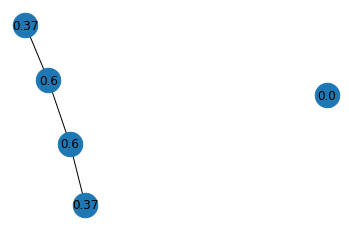

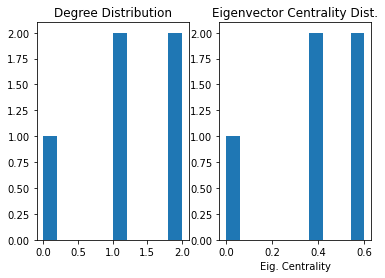

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the number of vertices
V = 5
# Establish the chances of an edge being added vertex to vertex
p = 0.5
# Initializes the graph
G = nx.Graph()
# Creates a random graph with V-vertices and a probability of p
G = nx.fast_gnp_random_graph(V,p)

eigen_vector_centrality = nx.eigenvector_centrality(G)
eigen_centrality_array = np.ones(len(eigen_vector_centrality))

for i in range(len(eigen_centrality_array)):
  eigen_centrality_array[i] = nx.eigenvector_centrality(G)[i]
  eigen_vector_centrality[i] = round(eigen_vector_centrality[i],2)
# Layout the shape of the graph
position = nx.spring_layout(G)
# Draw the graph, with the above position mapping and a modified
# node size
fig1, ax1 = plt.subplots()
nx.draw(G, pos=position, node_size= 600)
nx.draw_networkx_labels(G, position, labels = eigen_vector_centrality)
# On a seperate plot map the distribution of node degrees
fig1, ax2 = plt.subplots(1,2)
degrees = [v for k,v in nx.degree(G)]
ax2[0].hist(degrees)
ax2[1].hist(eigen_centrality_array)
ax2[0].set_title("Degree Distribution")
ax2[1].set_xlabel("Eig. Centrality")
ax2[1].set_title("Eigenvector Centrality Dist.")
plt.show()

#### Betweeness Centrality

* Intuition: A node is important if it lies on a lot of shortest paths between two other nodes

* Equations: 
$$c_v = \sum_{s \neq v \neq t} \dfrac{\# (\text{of shortest paths between s and t that contain v})}{\# (\text{shortest paths between s and t})}.$$


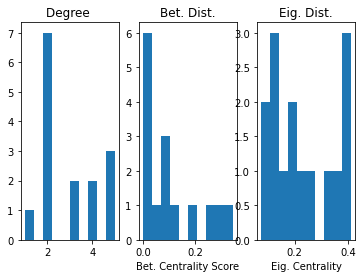

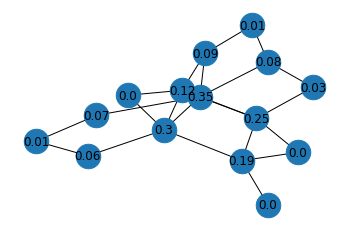

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the number of vertices
V = 15
# Establish the chances of an edge being added vertex to vertex
p = 0.2
# Initializes the graph
G = nx.Graph()
# Creates a random graph with V-vertices and a probability of p
G = nx.fast_gnp_random_graph(V,p)

# Layout the shape of the graph
position = nx.spring_layout(G)
# Draw the graph, with the above position mapping and a modified
# node size
# On a seperate plot map the distribution of node degrees
fig1, ax2 = plt.subplots(1,3)

degrees = [v for k,v in nx.degree(G)]
ax2[0].hist(degrees)
ax2[0].set_title("Degree ")

central_dict = nx.betweenness_centrality(G)
central = [0 for i in range(len(central_dict))]

for i in range(len(central_dict)):
  central[i] = central_dict[i]
  central_dict[i] = round(central_dict[i], 2)
ax2[1].hist(central)
ax2[1].set_xlabel("Bet. Centrality Score")
ax2[1].set_title("Bet. Dist.")

eigen_dict = nx.eigenvector_centrality(G)
eigen = [0 for i in range(len(eigen_dict))]
for i in range(len(eigen)):
  eigen[i] = nx.eigenvector_centrality(G)[i]
  eigen_dict[i] = round(eigen_dict[i], 2)
ax2[2].hist(eigen)
ax2[2].set_xlabel("Eig. Centrality")
ax2[2].set_title("Eig. Dist.")


fig1, ax1 = plt.subplots()
nx.draw(G, pos=position, node_size= 600)
nx.draw_networkx_labels(G, pos = position, labels = (central_dict))
plt.show()

#### Closeness Centrality



*   Intuition: A node is important if the paths to all other nodes is short; it is close to many other nodes.
*   Formula:
$$c_v = \dfrac{1}{\sum\limits_{u \neq v} \text{Shortest Path Length Between u and v}}$$



[(0, 5), (1, 4), (2, 6), (3, 4), (4, 3), (5, 5), (6, 6), (7, 8), (8, 4), (9, 5)]


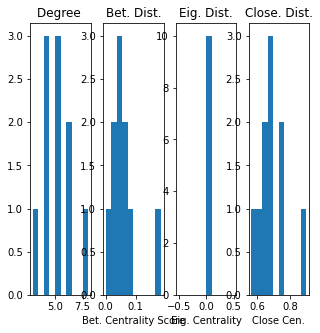

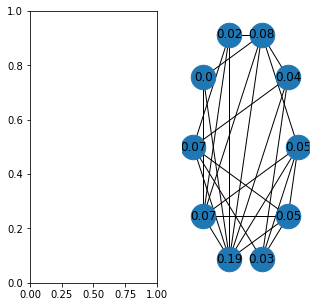

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the number of vertices
V = 10
# Establish the chances of an edge being added vertex to vertex
p = 0.5
# Initializes the graph
G = nx.Graph()
# Creates a random graph with V-vertices and a probability of p
G = nx.fast_gnp_random_graph(V,p)

# Layout the shape of the graph
position = nx.circular_layout(G)
# Draw the graph, with the above position mapping and a modified
# node size
# On a seperate plot map the distribution of node degrees
fig1, ax2 = plt.subplots(1,4)
fig1.set_figheight(5)
fig1.set_figwidth(5)
fig1, ax1 = plt.subplots(1,4)
fig1.set_figwidth(5)
fig1.set_figheight(5)

# Calculate the degree of nodes
degrees = [v for k,v in nx.degree(G)]
print(nx.degree(G))
ax2[0].hist(degrees)
ax2[0].set_title("Degree ")
nx.draw(G, pos = position, node_size = 600)
subax0 = plt.subplot(122)

# Calculate Betweenness Centrality
central_dict = nx.betweenness_centrality(G)
central = [0 for i in range(len(central_dict))]
for i in range(len(central_dict)):
  central[i] = central_dict[i]
  central_dict[i] = round(central_dict[i], 2)
ax2[1].hist(central)
ax2[1].set_xlabel("Bet. Centrality Score")
ax2[1].set_title("Bet. Dist.")
nx.draw(G, pos=position, node_size= 600)
nx.draw_networkx_labels(G, pos = position, labels = (central_dict))
plt.subplot(121, label = "x")

# Calculate Eigenvector Centrality
eigen_dict = nx.eigenvector_centrality(G)
eigen = [0 for i in range(len(eigen_dict))]
# for i in range(len(eigen)):
#   eigen[i] = nx.eigenvector_centrality(G)[i]
#   eigen_dict[i] = round(eigen_dict[i], 2)
ax2[2].hist(eigen)
ax2[2].set_xlabel("Eig. Centrality")
ax2[2].set_title("Eig. Dist.")
# ax1[2] = nx.draw(G, pos=position, node_size= 600)
# ax1[2] = nx.draw_networkx_labels(G, pos = position, labels = (eigen_dict))

# Calculate Closeness Centrality
close_dict = nx.closeness_centrality(G)
close = [0 for i in range(len(close_dict))]
for i in range(len(close)):
  close[i] = close_dict[i]
  close_dict[i] = round(close_dict[i], 2)
ax2[3].hist(close)
ax2[3].set_xlabel("Close Cen.")
ax2[3].set_title("Close. Dist.")

plt.show()


### **Structure-Based Features**

An alternate way of assigning value to a node is through how it relates to the overall structure of the network.
That is, instead of determining scores based on neighbors of the node we will determine measures based on features of the topology of the network.

#### **Clustering Coefficients**

Intuition: A node is important structurally if it's immediate neighbors are highly connected, in symbols, a node $v$ is important if $u,w \in N(v)$ implies $u$ is connected to $w$.

Formula:

$$e_v = \dfrac{\# (\text{edges among neighbors of }v)}{\binom{k_v}{2}} \qquad k_v = \text{degree of node } v,$$

$\binom{k_v}{2}$ counts the total number of possible edges among $v$'s neighbors.

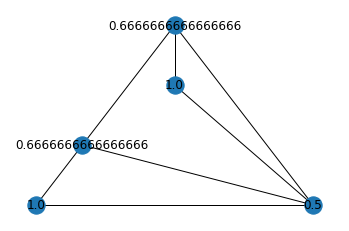

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Initializes the graph
G = nx.Graph([(1,2),(1,3),(2,4),(2,3),(4,3),(4,5),(5,3)])
# Creates a random graph with V-vertices and a probability of p

clustering_coefficients = nx.clustering(G)

# Layout the shape of the graph
position = nx.planar_layout(G)
nx.draw_networkx_labels(G, pos = position, labels = (clustering_coefficients))
nx.draw(G, pos = position)

## **Edge Features**

A classic problem in Network Analysis is edge prediction, this is the problem of given a network that evolves over time where is it most likely that edges will appear. In a social network problem, this is the problem of friend recommendations. To tackle this properly, we should first have some way of quantifying this possibility between two nodes.

* One way of testing our measures is by taking a graph that's fixed in time, deleting a subset of edges from it, and trying to predict those nodes should exist.

* Alternatively, given a network that adds nodes over time, we can build a model and compare our predictions to the real connections made.

### Proximity Measures

To focus our attention, we'll take a static social network and remove N edges from these networks ( but we won't remove edges that would lead the graph to being disconnected ). Then we seek to predict the edges that we removed by pulling the top 2N scoring node pairs.

A few graphs are considered below with three different "local neighborhood" indexes, these indexes are: 
* Shortest Distance Measure:
This is what is the shortest distance between the two nodes 
$$\sigma_S(u,v) = \text{The Shortest Distance between u and v}$$
* Jaccard Coefficient Measure:
This is how many immediate neighbors do the two have in common? Normalized by the size of the two's neighborhoods:
$$\sigma_J(u,v) = \dfrac{|N(u) \cap N(v)|}{|N(u) \cup N(v)|}$$

* Adamic-Adar Index: 
This one is less intuitive, but gives better results:
$$\sigma_A(u,v) = \sum_{i \in N(u) \cup N(v)} \dfrac{1}{\log(|N(i)|)} \qquad k_i = \text{Degree of node }i.$$

The graphs we look at below are built in to the Networkx library:
* The Zachary Karate Club graph, this was obtained from a 2 year study following social interactions between members of a karate club. Where nodes are people, and links are interactions.
* Les Miserables graph, this is all of the interactions between characters in Victor Hugo's Les Miserables.
* Florentine Family graph, this marks marriages among the Florentine renaissance families. 

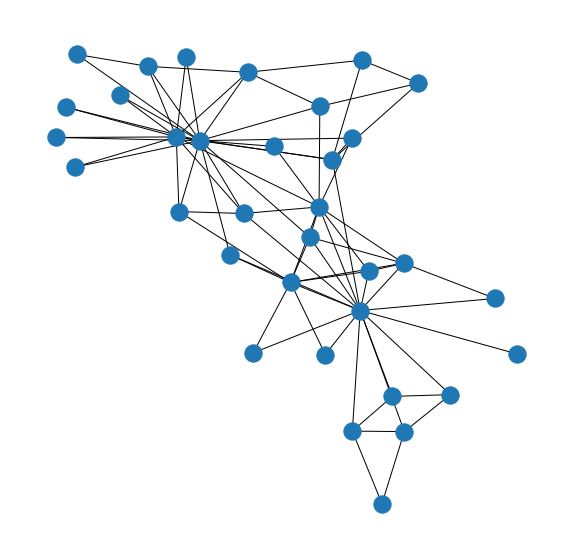

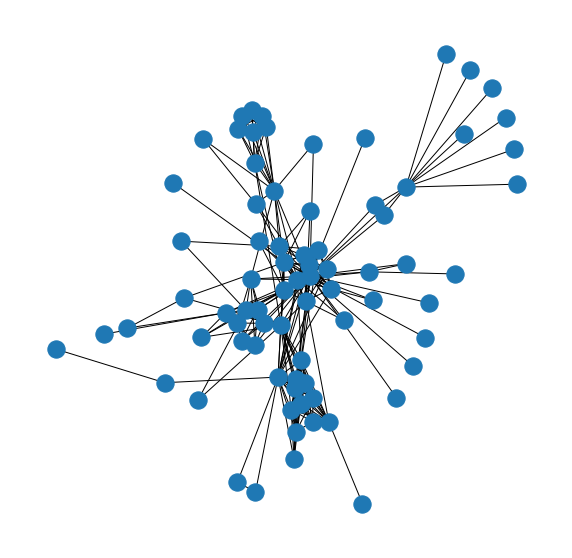

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from heapq import nlargest
import random 

# Look at the Karate Club Graph
G = nx.karate_club_graph()
# Draw in a Circular layout
fig1, ax1 = plt.subplots(1,1)
position = nx.spring_layout(G)
fig1.set_figheight(10)
fig1.set_figwidth(10)
nx.draw(G, pos = position)
fig2, ax2 = plt.subplots(1,1)
fig2.set_figheight(10)
fig2.set_figwidth(10)
G1 = nx.les_miserables_graph()
position = nx.spring_layout(G1)
nx.draw(G1, pos = position)
# Delete N random edges from graph
# N = 5
# E = []
# for (u,v) in G.edges():
#   E.append((u,v))
# edge_list = []
# for i in range(N):
#   edge_list.append(E.pop(random.randrange(len(E))))
#   i += 1
# G.remove_edges_from(edge_list)
# # Determine the Shortest path length between all pairs of nodes, print the top 2N
# short_path_length = dict(nx.shortest_path_length(G))
# array = ([(x,y,short_path_length[x][y]) for x in short_path_length for y in short_path_length[x] if x != y])
# array = pd.DataFrame(array)
# array.rename(columns={0: "Node 1", 1: "Node 2", 2: "Shortest Distance"},inplace=True)
# array["Node Tuple"] = array.apply(lambda row : (min(row["Node 1"], row["Node 2"]),max(row["Node 2"], row["Node 1"])), axis = 1)
# array.drop_duplicates(subset=["Node Tuple"], inplace=True)
# G.remove_edges_from([(14,16)])
# array["Is A Removed Edge"] = array.apply(lambda row : ({row["Node Tuple"]} & set(edge_list)) != set() , axis = 1)
# print("The Edges removed were: " + str(edge_list))
# array.nlargest(2*N,"Shortest Distance")


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from heapq import nlargest
import random 

Iterations = 10

TP_C = np.zeros(Iterations)
FP_C = np.zeros(Iterations)
TP_S = np.zeros(Iterations)
FP_S = np.zeros(Iterations)
TP_A = np.zeros(Iterations)
FP_A = np.zeros(Iterations)
# TN = np.zeros(Iterations)
# FN = np.zeros(Iterations)

for j in range(Iterations):
  G = nx.karate_club_graph()

  # position = nx.circular_layout(G)
  # nx.draw(G, pos = position)

  # Delete N random edges from graph
  N = 10
  E = []
  bridges = list(nx.bridges(G))
  E = G.edges()
  E = list(E - bridges)
  edge_list = []
  for i in range(N):
    edge_list.append(E[random.randrange(len(E))])
    i += 1
  G_prime = G
  G_prime.remove_edges_from(edge_list)
  G.remove_edges_from(edge_list)
  common_neighbors = list(nx.jaccard_coefficient(G))
  common_neighbors = pd.DataFrame(common_neighbors)
  shortest_distance = dict(nx.shortest_path_length(G))
  shortest_distance = ([(x,y,shortest_distance[x][y]) for x in shortest_distance for y in shortest_distance[x] if x != y])
  shortest_distance = pd.DataFrame(shortest_distance)
  adamic_adar_distance = list(nx.adamic_adar_index(G))
  adamic_adar_distance = pd.DataFrame(adamic_adar_distance)
  common_neighbors.rename(columns={0: "Node 1", 1: "Node 2", 2: "Common Neighbors"},inplace=True)
  shortest_distance.rename(columns={0: "Node 1", 1: "Node 2", 2: "Shortest Path Length"},inplace=True)
  adamic_adar_distance.rename(columns={0: "Node 1", 1: "Node 2", 2: "Adamic-Adar Index"},inplace=True)
  array = pd.merge(shortest_distance, adamic_adar_distance, on=['Node 1', 'Node 2'])
  array = pd.merge(array, common_neighbors, on = ['Node 1', 'Node 2'])

  array["Node Tuple"] = array.apply(lambda row : (min(row["Node 1"], row["Node 2"]),max(row["Node 2"], row["Node 1"])), axis = 1)
  array.drop_duplicates(subset=["Node Tuple"], inplace=True)
  array["Is A Removed Edge"] = array.apply(lambda row : ({row["Node Tuple"]} & set(edge_list)) != set() , axis = 1)
  largest_2N_C = array.nlargest(N,"Common Neighbors")
  largest_2N_S = array.nsmallest(N,"Shortest Path Length")
  largest_2N_A = array.nlargest(N,"Adamic-Adar Index")
  # array = array[~array.isin(largest_2N_C)].dropna()
  TP_C[j] = len(largest_2N_C[largest_2N_C["Is A Removed Edge"] == True])
  FP_C[j] = len(largest_2N_C[largest_2N_C["Is A Removed Edge"] == False])
  TP_S[j] = len(largest_2N_S[largest_2N_S["Is A Removed Edge"] == True])
  FP_S[j] = len(largest_2N_S[largest_2N_S["Is A Removed Edge"] == False])
  TP_A[j] = len(largest_2N_A[largest_2N_A["Is A Removed Edge"] == True])
  FP_A[j] = len(largest_2N_A[largest_2N_A["Is A Removed Edge"] == False])
  # TN[j] = len(array[array["Is A Removed Edge"] == False])
  # FN[j] = len(array[array["Is A Removed Edge"] == True])
Results = pd.DataFrame()
Results["TP of JC"] = TP_C.tolist()
Results["TP of Shortest"] = TP_S.tolist()
Results["TP of Adamic-Adar"] = TP_A.tolist()
Results

,TP of JC,TP of Shortest,TP of Adamic-Adar
0,0.0,1.0,0.0
1,0.0,2.0,0.0
2,1.0,2.0,3.0
3,0.0,2.0,1.0
4,0.0,0.0,0.0
5,0.0,3.0,2.0
6,0.0,2.0,2.0
7,0.0,2.0,2.0
8,0.0,2.0,1.0
9,0.0,3.0,4.0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from heapq import nlargest
import random 

Iterations = 10

TP_C = np.zeros(Iterations)
FP_C = np.zeros(Iterations)
TP_S = np.zeros(Iterations)
FP_S = np.zeros(Iterations)
TP_A = np.zeros(Iterations)
FP_A = np.zeros(Iterations)
# TN = np.zeros(Iterations)
# FN = np.zeros(Iterations)

for j in range(Iterations):
  G = nx.les_miserables_graph()

  # position = nx.circular_layout(G)
  # nx.draw(G, pos = position)

  # Delete N random edges from graph
  N = 10
  E = []
  bridges = list(nx.bridges(G))
  E = G.edges()
  E = list(E - bridges)
  edge_list = []
  for i in range(N):
    edge_list.append(E[random.randrange(len(E))])
    i += 1
  G_prime = G
  G_prime.remove_edges_from(edge_list)
  G.remove_edges_from(edge_list)
  common_neighbors = list(nx.jaccard_coefficient(G))
  common_neighbors = pd.DataFrame(common_neighbors)
  shortest_distance = dict(nx.shortest_path_length(G))
  shortest_distance = ([(x,y,short_path_length[x][y]) for x in short_path_length for y in short_path_length[x] if x != y])
  shortest_distance = pd.DataFrame(shortest_distance)
  adamic_adar_distance = list(nx.adamic_adar_index(G))
  adamic_adar_distance = pd.DataFrame(adamic_adar_distance)
  common_neighbors.rename(columns={0: "Node 1", 1: "Node 2", 2: "Common Neighbors"},inplace=True)
  shortest_distance.rename(columns={0: "Node 1", 1: "Node 2", 2: "Shortest Path Length"},inplace=True)
  adamic_adar_distance.rename(columns={0: "Node 1", 1: "Node 2", 2: "Adamic-Adar Index"},inplace=True)
  array = pd.merge(shortest_distance, adamic_adar_distance, on=["Node 1", "Node 2"])
  array = pd.merge(array, common_neighbors, on = ['Node 1', 'Node 2'])

  array["Node Tuple"] = array.apply(lambda row : (min(row["Node 1"], row["Node 2"]),max(row["Node 2"], row["Node 1"])), axis = 1)
  array.drop_duplicates(subset=["Node Tuple"], inplace=True)
  array["Is A Removed Edge"] = array.apply(lambda row : ({row["Node Tuple"]} & set(edge_list)) != set() , axis = 1)
  largest_2N_C = array.nlargest(2*N,"Common Neighbors")
  largest_2N_S = array.nlargest(2*N,"Shortest Path Length")
  largest_2N_A = array.nlargest(2*N,"Adamic-Adar Index")
  # array = array[~array.isin(largest_2N_C)].dropna()
  TP_C[j] = len(largest_2N_C[largest_2N_C["Is A Removed Edge"] == True])
  FP_C[j] = len(largest_2N_C[largest_2N_C["Is A Removed Edge"] == False])
  TP_S[j] = len(largest_2N_S[largest_2N_S["Is A Removed Edge"] == True])
  FP_S[j] = len(largest_2N_S[largest_2N_S["Is A Removed Edge"] == False])
  TP_A[j] = len(largest_2N_A[largest_2N_A["Is A Removed Edge"] == True])
  FP_A[j] = len(largest_2N_A[largest_2N_A["Is A Removed Edge"] == False])
  # TN[j] = len(array[array["Is A Removed Edge"] == False])
  # FN[j] = len(array[array["Is A Removed Edge"] == True])
Results = pd.DataFrame()
Results["TP of JC"] = TP_C.tolist()
Results["FP of JC"] = FP_C.tolist()
Results["TP of Shortest"] = TP_S.tolist()
Results["FP of Shortest"] = FP_S.tolist()
Results["TP of Adamic-Adar"] = TP_A.tolist()
Results["FP of Adamic-Adar"] = FP_A.tolist()
Results

NameError: ignored

# Data Applications

Given below "The Marvel Comics character collaboration graph" was originally constructed by Cesc Rosselló, Ricardo Alberich, and Joe Miro from the University of the Balearic Islands. They compare the characteristics of this universe to real-world collaboration networks, or the one created by scientists who work together in producing research papers. With this dataset, the authors published the paper titled: "Marvel Universe looks almost like a real social network".

Given the size of the dataset (the "hero-network.csv" is has 90000+ edge pairs) we simply look at the first 10000 entries of the data set and analyze the importance-based features: 

* Eigenvector Centrality: A hero is important if they're connected with other important heros. This might tell us who are the heros that have a lot of influence in the Marvel universe, because of their connections.

* Betweenness Centrality: A hero is important if they lie in the shortest paths between other heros.

* Closeness Centrality: A hero is important if they are a few degrees removed from many other heros. (Think 7-degrees of Kevin Bacon)

* Degree Centrality: A hero is important if they have many connections to other heros.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from heapq import nlargest

# Initialize graph
edges_hero = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/edges.csv')
nodes_hero = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/nodes.csv')
hero_network = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/hero-network.csv')

# First N edge pairs
N = 10000

hero_network = hero_network.head(n = N)
G = nx.from_pandas_edgelist(hero_network, source = "hero1", target = "hero2", create_using=nx.DiGraph())

# position = nx.circular_layout(G)
# nx.draw(G, with_labels= True, pos=position)

# Network Analysis
# eigenvector_measure = nx.eigenvector_centrality(G)
# betweenness_measure = nx.betweenness_centrality(G)
# closeness_measure = nx.closeness_centrality(G)
# degree_measure = nx.degree_centrality(G)
# hero_network.append(eigenvector_measure,ignore_index=True)

# betweenness_top_10 = nlargest(10, betweenness_measure, betweenness_measure.get)
# eigenvector_top_10 = nlargest(10, eigenvector_measure, eigenvector_measure.get)
# closeness_top_10 = nlargest(10, closeness_measure, closeness_measure.get)


# df_scores = pd.DataFrame()
# for i in G.nodes():
#   df_scores = df_scores.append({"Name" : i, "Eigenvector Centrality" : eigenvector_measure[i], "Betweenness Centrality" : betweenness_measure[i], "Closeness Centrality" : closeness_measure[i], "Degree Centrality" : degree_measure[i]}, ignore_index=True)

# print(df_scores.nlargest(10, "Eigenvector Centrality")[["Eigenvector Centrality", "Name"]])

# print(df_scores.nlargest(10, "Betweenness Centrality")[["Betweenness Centrality", "Name"]])

# print(df_scores.nlargest(10, "Closeness Centrality")[["Closeness Centrality", "Name"]])

# print(df_scores.nlargest(10, "Degree Centrality")[["Degree Centrality", "Name"]])


# G_subset = nx.from_pandas_edgelist(hero_network.head(int(N/100)), source = "hero1", target = "hero2", create_using=nx.DiGraph())
# position = nx.circular_layout(G_subset)
# nx.draw(G_subset, with_labels = True, pos = position)

adj = nx.to_numpy_array(G)

out_degree = nx.out_degree_centrality(G)

data = list(out_degree.items())

out_degree = np.array(data)

adj
# comics, heros = bipartite.sets(G)

# location = nx.bipartite_layout(G,comics)

# bottom_nodes, top_nodes = bipartite.sets(G)
# location = nx.bipartite_layout(G,bottom_nodes)

# # Layout the shape of the graph
# # Draw the graph, with the above position mapping and a modified
# # node size
# fig1, ax1 = plt.subplots()
# nx.draw(G, pos=location, node_size=100 )
# # On a seperate plot map the distribution of node degrees
# fig1, ax2 = plt.subplots()
# degrees = [v for k,v in nx.degree(G)]
# plt.hist(degrees)
# plt.title("Degree Distribution")
# plt.xlabel("Number of Nodes")
# plt.ylabel("Degree of Nodes")
# print("The mean value of the degrees is " + str(np.mean(degrees)))

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

# Page Rank Algorithm

PageRank an algorithm first proposed famously in [Page, Lawrence, et al. The PageRank citation ranking: Bringing order to the web. Stanford InfoLab, 1999](https://http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf). This is the alogorithm originally used by Google.

The idea behind PageRank is treat the internet as a directed network, where each node is a webpage and each edge is a hyperlink from one webpage to another.
Each node is then assigned some initial importance, $r_i$ for a node $i$.
This might be some initial guess, more commonly this is just set to 1 for the initilization.
Then we determine the update as:
$$r_j = \sum_{i \to j} \dfrac{r_i}{d_i} \qquad d_i \text{ is the in-degree of node i}$$
$i \to j$, denotes all the in-edges of $j$.





In [ ]:
from numpy.core.defchararray import upper
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from heapq import nlargest

# Initialize graph
edges_hero = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/edges.csv')
nodes_hero = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/nodes.csv')
hero_network = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/hero-network.csv')

# First N edge pairs
max_iterations = 10

hero_network = hero_network
G = nx.from_pandas_edgelist(hero_network, source = "hero1", target = "hero2", create_using=nx.DiGraph())

# position = nx.circular_layout(G)
# nx.draw(G, with_labels= True, pos=position)

# Network Analysis
# eigenvector_measure = nx.eigenvector_centrality(G)
# betweenness_measure = nx.betweenness_centrality(G)
# closeness_measure = nx.closeness_centrality(G)
# degree_measure = nx.degree_centrality(G)
# hero_network.append(eigenvector_measure,ignore_index=True)

# betweenness_top_10 = nlargest(10, betweenness_measure, betweenness_measure.get)
# eigenvector_top_10 = nlargest(10, eigenvector_measure, eigenvector_measure.get)
# closeness_top_10 = nlargest(10, closeness_measure, closeness_measure.get)


# df_scores = pd.DataFrame()
# for i in G.nodes():
#   df_scores = df_scores.append({"Name" : i, "Eigenvector Centrality" : eigenvector_measure[i], "Betweenness Centrality" : betweenness_measure[i], "Closeness Centrality" : closeness_measure[i], "Degree Centrality" : degree_measure[i]}, ignore_index=True)

# print(df_scores.nlargest(10, "Eigenvector Centrality")[["Eigenvector Centrality", "Name"]])

# print(df_scores.nlargest(10, "Betweenness Centrality")[["Betweenness Centrality", "Name"]])

# print(df_scores.nlargest(10, "Closeness Centrality")[["Closeness Centrality", "Name"]])

# print(df_scores.nlargest(10, "Degree Centrality")[["Degree Centrality", "Name"]])


# G_subset = nx.from_pandas_edgelist(hero_network.head(int(N/100)), source = "hero1", target = "hero2", create_using=nx.DiGraph())
# position = nx.circular_layout(G_subset)
# nx.draw(G_subset, with_labels = True, pos = position)

name = input("Input the name of a super hero (type <end> to stop):")
while name != "end":
  name = name.upper()

  error_tolerance = 1*10**(-2)
  error = 1


  G_search = G

  beta = 0.8
  total_nodes = len(list(G_search.nodes()))

  num_to_dictionary = dict(zip(range(total_nodes), G_search.nodes()))

  M = nx.to_numpy_array(G_search)

  D = np.tile(M.sum(axis=0),(total_nodes,1))

  Teleport = np.ones(shape=(total_nodes,total_nodes))
  Teleport = (1 - beta)/(total_nodes) * Teleport

  M = beta*np.divide(M, D, out=np.zeros_like(M), where = D!=0)

  G_matrix = M + Teleport

  r_0 = np.ones(shape=(total_nodes,1))

  r = r_0
  iterations = 0
  while error > error_tolerance or iterations <= max_iterations:
    old_r = r
    new_r = np.matmul(G_matrix,old_r)
    r = new_r
    error = sum(np.absolute(new_r - old_r))
    iterations += 1

  Results = dict(zip(G_search.nodes(),r))
  Results = {k: v for k, v in sorted(Results.items(), key=lambda item: item[1])}
  
  Search_list = [i for i in Results if name in i]

  Results = dict((k, Results[k]) for k in Search_list)
  Final = sorted(Results, key=Results.get, reverse=True)[:10]
  print(Final)
  # Final = nlargest(10, G_search)

  # print(G_search)
  # print("Your results are:")
  # print(Final)
  name = input("Input the name of a super hero (type <end> to stop):")

# comics, heros = bipartite.sets(G)

# location = nx.bipartite_layout(G,comics)

# bottom_nodes, top_nodes = bipartite.sets(G)
# location = nx.bipartite_layout(G,bottom_nodes)

# # Layout the shape of the graph
# # Draw the graph, with the above position mapping and a modified
# # node size
# fig1, ax1 = plt.subplots()
# nx.draw(G, pos=location, node_size=100 )
# # On a seperate plot map the distribution of node degrees
# fig1, ax2 = plt.subplots()
# degrees = [v for k,v in nx.degree(G)]
# plt.hist(degrees)
# plt.title("Degree Distribution")
# plt.xlabel("Number of Nodes")
# plt.ylabel("Degree of Nodes")
# print("The mean value of the degrees is " + str(np.mean(degrees)))

['IRON MAN/TONY STARK ', 'IRON FIST/DANIEL RAN', 'IRON MAN IV/JAMES R.', 'IRON MAN DOPPELGANGE', 'IRON MAN V/TEEN TONY', 'IRONCLAD', 'IRON CROSS/HELMUT GR', 'IRON', 'IRON MAIDEN/', "O'HARA, ROBERT IRONG"]
